In [3]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared, ConstantKernel
from sklearn.kernel_ridge import KernelRidge

### Midterm 1 Project, Problem 2-3

Optimized Kernel: ExpSineSquared(length_scale=1.84, periodicity=6.45) + WhiteKernel(noise_level=0.14)
Optimized hyperparameters:
Periodicity (p): 6.447335368768318
Length Scale (ℓ): 1.8431891941054277
Noise Level (σ): 0.37480938853048
New Noise Level (σ * 2): 0.74961877706096


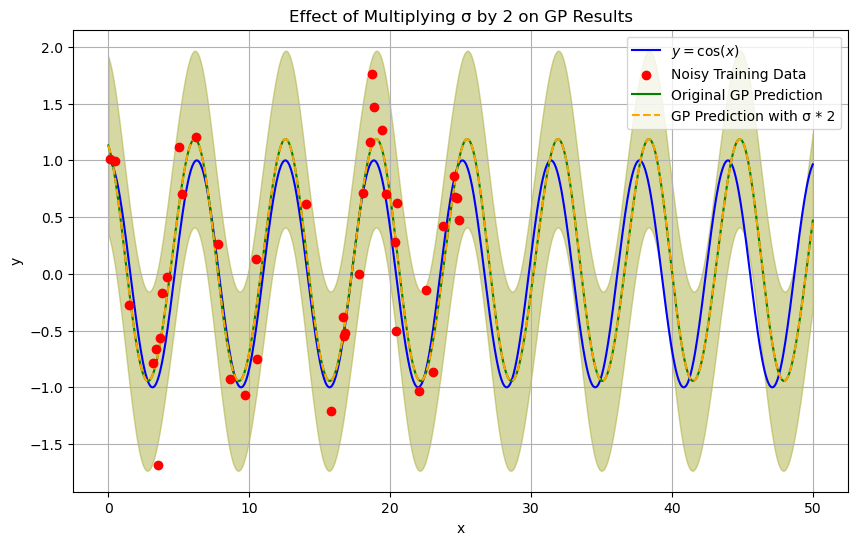

In [4]:
# Part 1: Generate noisy data as done previously
x = np.linspace(0, 50, 1000)  # Generate 1000 evenly spaced x data points
y_true = np.cos(x)  # True function y = cos(x)

# Randomly select 40 points from the first 500 data points
np.random.seed(42)  # Ensure reproducibility
indices = np.random.choice(np.arange(500), size=40, replace=False)

# Add i.i.d. random noise (mean 0, variance 0.16) to the 40 selected points
noise = np.random.normal(0, np.sqrt(0.16), size=40)
x_train = x[indices].reshape(-1, 1)  # Select 40 x points from the first 500
y_train_noisy = y_true[indices] + noise  # Add noise to the corresponding y points

# Part 2: Fit a Gaussian Process (GP) model using a periodic kernel and a white noise kernel
# Define the kernel: periodic kernel (ExpSineSquared) + white noise (WhiteKernel)
kernel = ExpSineSquared(length_scale=1.0, periodicity=1.0) + WhiteKernel(noise_level=1.0)

# Create the Gaussian Process Regressor with the specified kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP to the noisy data
gp.fit(x_train, y_train_noisy)

# Predict using the GP on the full x range
x_pred = x.reshape(-1, 1)
y_pred, y_std = gp.predict(x_pred, return_std=True)

# Extract the learned kernel hyperparameters
kernel_optimized = gp.kernel_
print("Optimized Kernel:", kernel_optimized)

# Extract the specific hyperparameters from the optimized kernel
p = kernel_optimized.k1.periodicity  # Periodicity (p)
ell = kernel_optimized.k1.length_scale  # Length scale (ℓ)
sigma = np.sqrt(kernel_optimized.k2.noise_level)  # Noise level (σ)

# Report the hyperparameters
print(f"Optimized hyperparameters:")
print(f"Periodicity (p): {p}")
print(f"Length Scale (ℓ): {ell}")
print(f"Noise Level (σ): {sigma}")

# Part 3: Multiply the optimized σ by 2
new_sigma = 2 * sigma
print(f"New Noise Level (σ * 2): {new_sigma}")

# Update the kernel with the new noise level (σ * 2)
new_kernel = ExpSineSquared(length_scale=ell, periodicity=p) + WhiteKernel(noise_level=new_sigma**2)

# Re-fit the GP with the modified kernel
gp_new = GaussianProcessRegressor(kernel=new_kernel, n_restarts_optimizer=10)
gp_new.fit(x_train, y_train_noisy)

# Predict using the GP with modified noise level
y_pred_new, y_std_new = gp_new.predict(x_pred, return_std=True)

# Plot the results with the original GP and new GP after multiplying σ by 2
plt.figure(figsize=(10, 6))

# Plot the true function y = cos(x)
plt.plot(x, y_true, label=r"$y = \cos(x)$", color='blue')

# Plot the noisy training data points
plt.scatter(x_train, y_train_noisy, label="Noisy Training Data", color='red', zorder=5)

# Plot the original GP predictions with uncertainty bounds
plt.plot(x_pred, y_pred, label="Original GP Prediction", color='green')
plt.fill_between(x_pred.flatten(), y_pred - 1.96 * y_std, y_pred + 1.96 * y_std, alpha=0.2, color='green')

# Plot the new GP predictions with increased noise level
plt.plot(x_pred, y_pred_new, label="GP Prediction with σ * 2", color='orange', linestyle='--')
plt.fill_between(x_pred.flatten(), y_pred_new - 1.96 * y_std_new, y_pred_new + 1.96 * y_std_new, alpha=0.2, color='orange')

# Set labels, title, and legend
plt.title("Effect of Multiplying σ by 2 on GP Results")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


When σ is increased, the model assumes that the noise level in the data is higher, resulting in a broader prediction uncertainty range (confidence interval). In the plot, this effect is visible as a difference between the green region (original model) and the orange region (modified model). However, this change does not significantly affect the mean prediction. This is because the Gaussian Process (GP) mean function remains dominated by the observed data, with the increased noise level mainly affecting how confident the model is about its predictions rather than changing the prediction itself.
